## Logistic Regression 

by Rina Buoy, PhD

### Synthetic Dataset

In [1]:
import numpy as np
# Generate a simple dataset (example)

np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Target: sum of features > 1

Text(0, 0.5, 'X2')

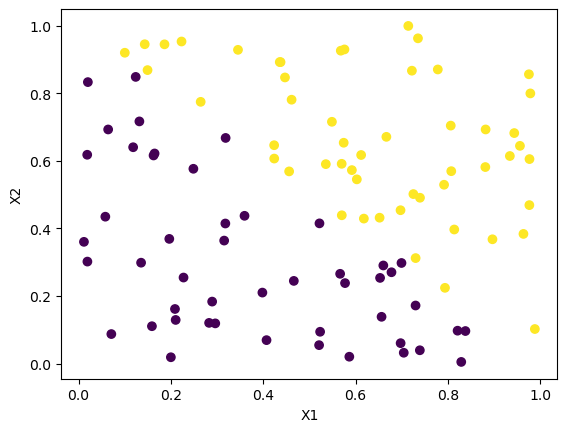

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0],X[:, 1],c=y)
plt.xlabel('X1')
plt.ylabel('X2')

### Implementing a Logistic Regression Model and Solver using Gradient Descent

In [3]:


class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        """Sigmoid function to map predictions to probabilities."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Training the logistic regression model using gradient descent."""
        # m -> number of samples, n -> number of features
        self.m, self.n = X.shape
        # Initialize weights and bias
        self.theta = np.zeros(self.n)
        self.bias = 0
        # Gradient descent
        for i in range(self.iterations):
            # Linear model: z = X * theta + bias
            z = np.dot(X, self.theta) + self.bias
            # Apply sigmoid function
            y_pred = self.sigmoid(z)
            # Compute gradients
            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)
            # Update weights
            self.theta -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X , is_prob = False):
        """Predicting the class labels (0 or 1)."""
        z = np.dot(X, self.theta) + self.bias
        y_pred = self.sigmoid(z)
        # Convert probabilities to class labels
        if not is_prob :
            return [1 if i > 0.5 else 0 for i in y_pred]
        else:
            return y_pred



### Logistic Regression Training

In [4]:
# Create a logistic regression model and fit the data
model = LogisticRegressionGD(learning_rate=0.1, iterations=1000)
model.fit(X, y)

# Predict the values for training data
predictions = model.predict(X)

# Print model's learned parameters and predictions
print("Weights:", model.theta)
print("Bias:", model.bias)
print("Predictions:", predictions)
print("Accuracy:", np.mean(predictions == y))

Weights: [2.74793984 3.75487073]
Bias: -3.0266841999729803
Predictions: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0]
Accuracy: 0.94


### Decision Boundary

In [10]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model, is_prob = False):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
    # Define min and max values for X axis and Y axis
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predict over the grid of values
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()],is_prob)
    Z = np.array(Z).reshape(xx.shape)
    
    # Plot the contour and decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if not is_prob:
        plt.title('Decision Boundary')
    else:
        plt.title('Decision Boundary (Probability)')
    plt.colorbar()

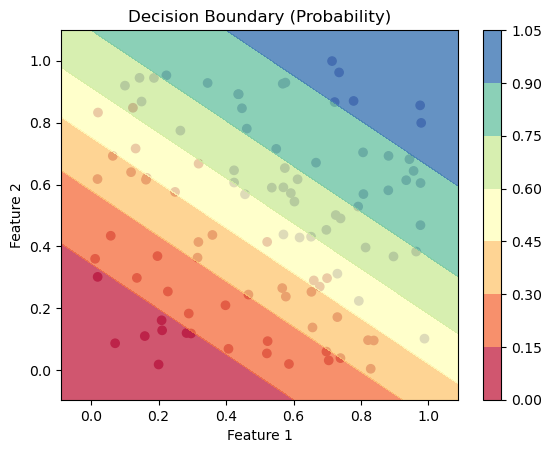

In [11]:
# Plot the decision boundary
plot_decision_boundary(X, y, model, True)


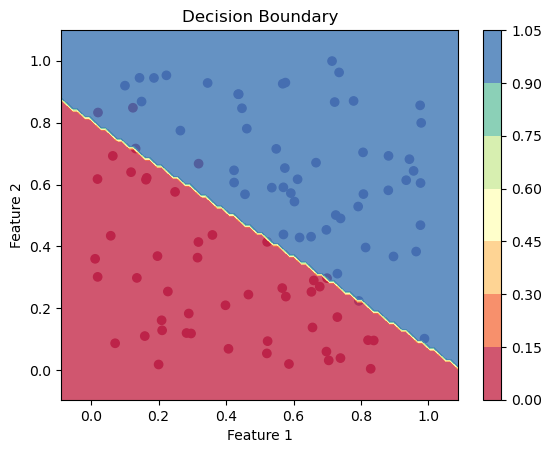

In [12]:
# Plot the decision boundary
plot_decision_boundary(X, y, model, False)